In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import scipy.optimize as opt
import scipy.constants as const
import os
import lal as lal
from scipy.signal import spectrogram
import gw_detections_functions as gw
title_size = 16
axis_size = 12


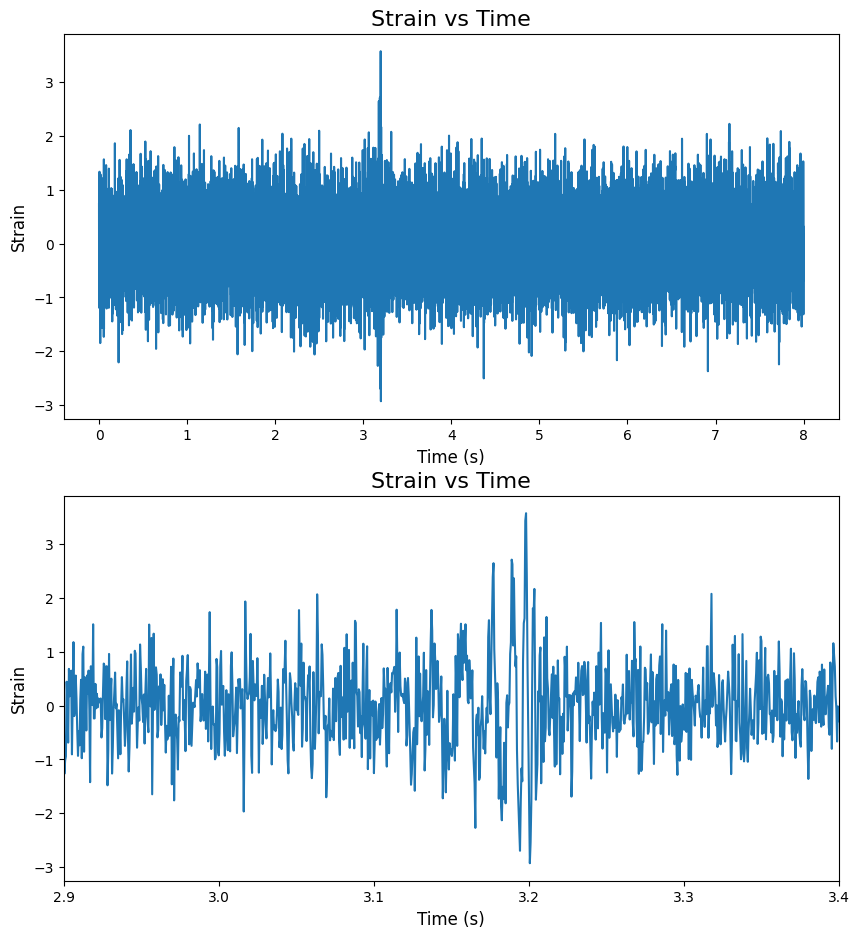

In [13]:
data = np.loadtxt('data_files/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]

plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)

plt.subplot(2,1,2)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.xlim(2.9,3.4)
plt.show()

The siganl shows a peak in the strain likely as the black holes collide releasing a lot of energy in a short amount of time.

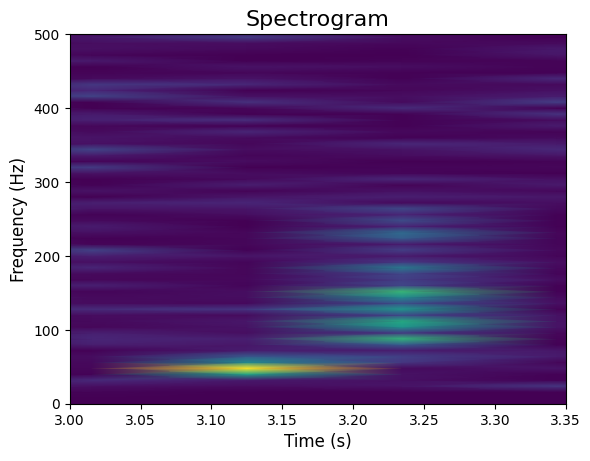

In [3]:
spec_f, spec_t, spec = sp.signal.spectrogram(strain, 2048)
plt.pcolormesh(spec_t, spec_f, spec, shading='gouraud')
plt.ylabel('Frequency (Hz)', fontsize=axis_size)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3,3.35)
plt.ylim(0,500)
plt.title('Spectrogram', fontsize=title_size)
plt.show()


reasonable mass of a black hole in merger 7 - 37 solar masses

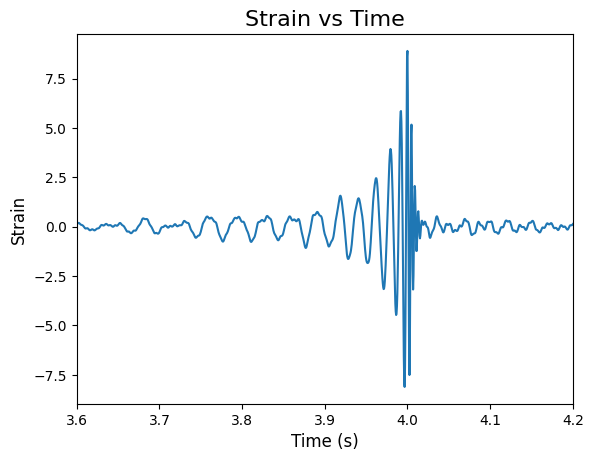

In [4]:
inv_psd = np.loadtxt('data_files/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(37,36,2048,8,inv_psd,400)

plt.figure()
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3.6,4.2)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()


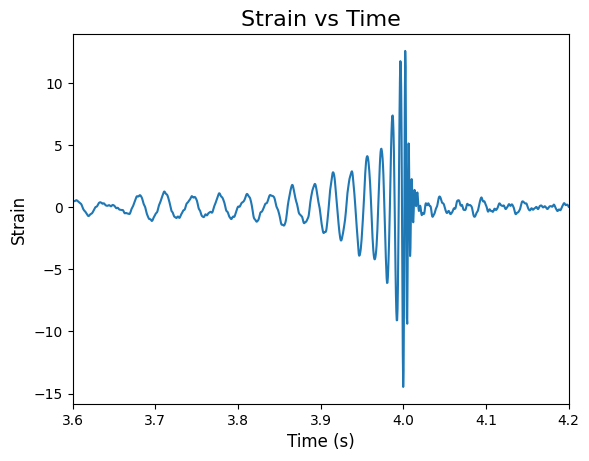

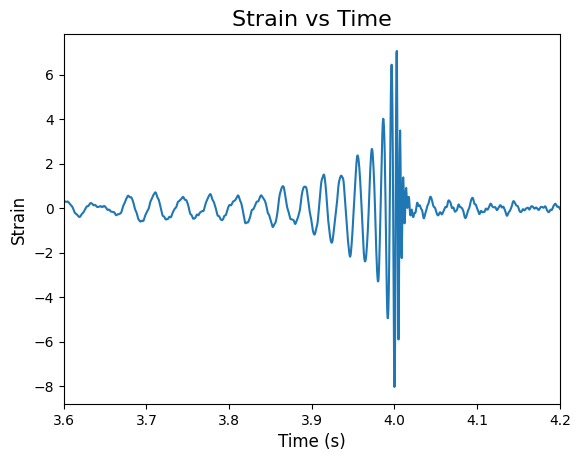

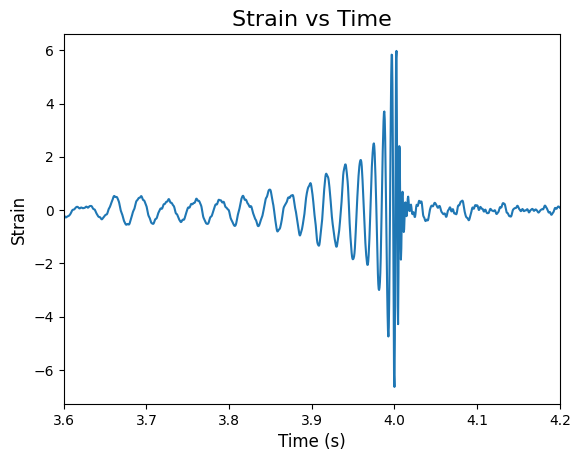

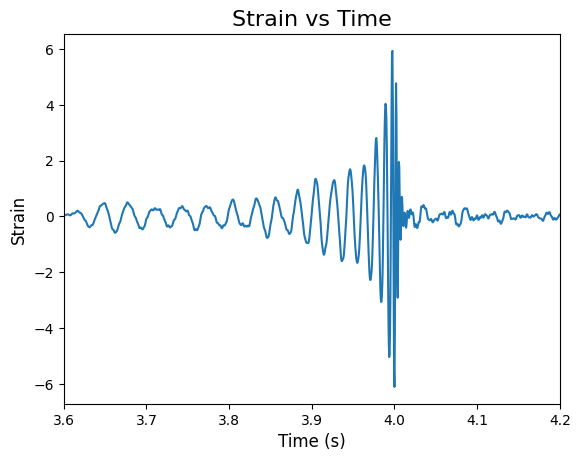

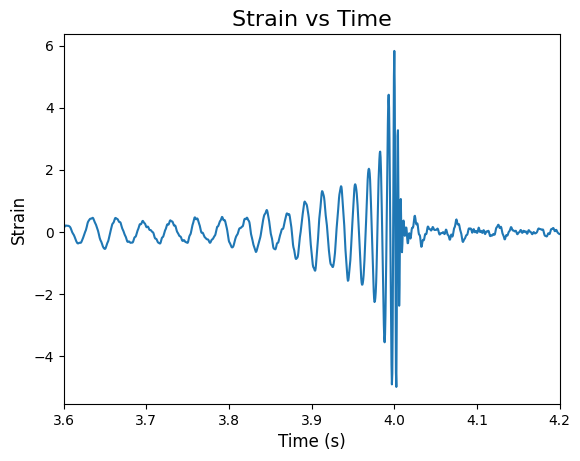

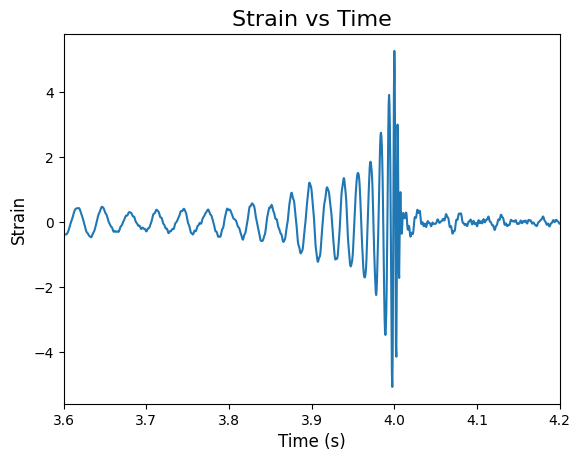

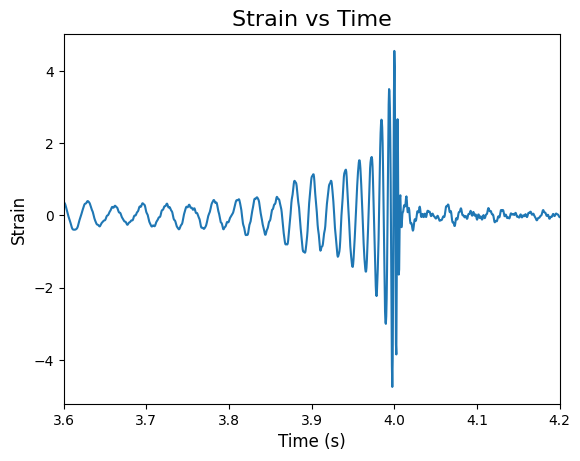

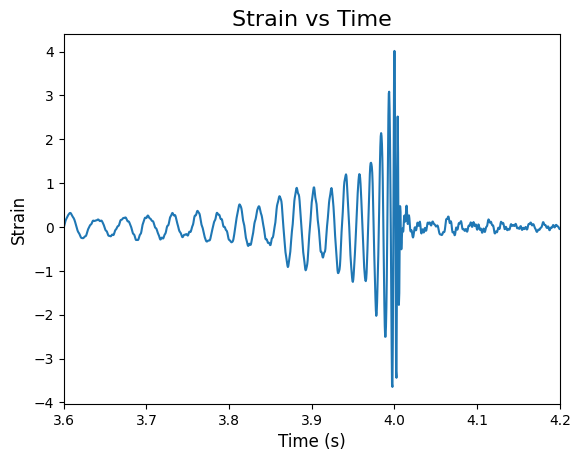

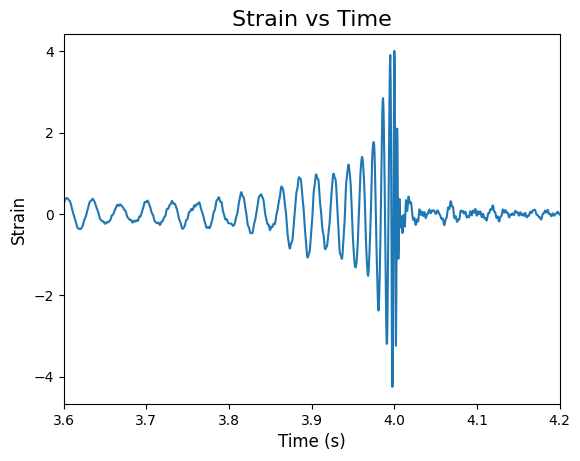

In [16]:
mass_one = [37,38,36,35,34,33,32,31,25]
mass_two = [24,23,22,21,20,19,18,17,24]
mass_three = np.array(mass_one) - 1
distance = [400,500,350,450,430,510,390,200,420]
distance = np.sort(np.array(distance))
for i in range(len(mass_one)):
        t, template = gw.make_template(mass_one[i],mass_two[i],2048,8,inv_psd,distance[i])
        plt.figure()
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(3.6,4.2)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()



# Task 2

As distance increases the amplitude of the wave decreases.
not much changes for masses that are simlar or different

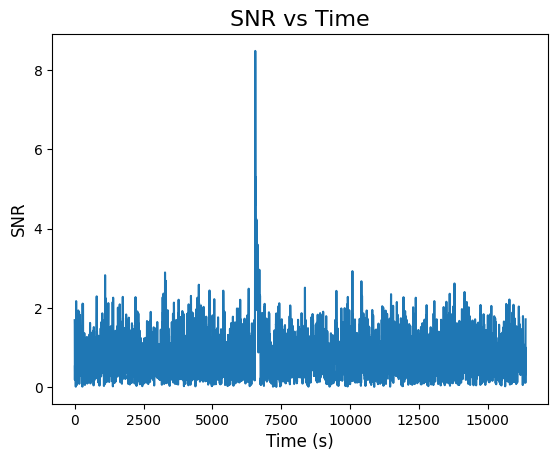

In [6]:
snr_ts = gw.get_snr(strain, template, 2048)
plt.figure()
plt.plot(snr_ts)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('SNR', fontsize=axis_size)
plt.title('SNR vs Time', fontsize=title_size)

plt.show()


### Part a

13.68899513975126 47.5 28.0
169


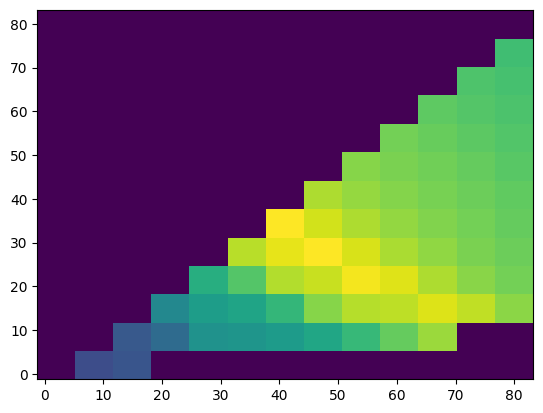

In [132]:
masses = np.linspace(2,80,13)
currentmax = 0
highest_snr = [[0 for x in range(13)] for y in range(13)]
mass1 = [] 
mass2 = [] 
allsnr = []

for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr.append(0)
print(currentmax, M1, M2)





reshaped = (np.reshape(allsnr, (13,13)).T)
plt.pcolor(masses, masses, reshaped)

Best fit mass pair for snr result is 36,35 solar masses

### Part b

In [110]:
def make_signal(t,d,tc,phic):
    _,signal = gw.make_template(mass1,mass2,2048,t,inv_psd,d=d,tc=tc,phic=phic)
    return signal
t=8
distances = np.linspace(100,1000,100)

ht_err = np.ones(ht.size)
b = [[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]]
popt, pcov = curve_fit(make_signal,t ,ht, p0 = [t, distances, 2, 0.5], bounds=b, sigma=ht_err, absolute_sigma=True)

t, template = gw.make_template(mass1,mass2,2048,8,inv_psd,distance[i])

NameError: name 'ht' is not defined

# Task 2 part a brute force method


In [ ]:
masses = np.linspace(2,80,13)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    final_mass1
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])

masses = np.linspace(15,70,20)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    #print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    


masses = np.linspace(33,40,200)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])


In [ ]:
# for m1 in mass1:
#     for m2 in mass2:
#           if m1>m2 and (m1/m2) < 8:
#             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
#             snr_ts = gw.get_snr(strain, template, 2048)
#             highest_snr.append(np.max(snr_ts))
#             mass1_2.append(m1)
#             mass2_2.append(m2)
